In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import optuna
import os
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
train= pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df= train
train

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
train.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
train.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [7]:
train

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [8]:
list= ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in list:
    print(col+":", train[col].unique())

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


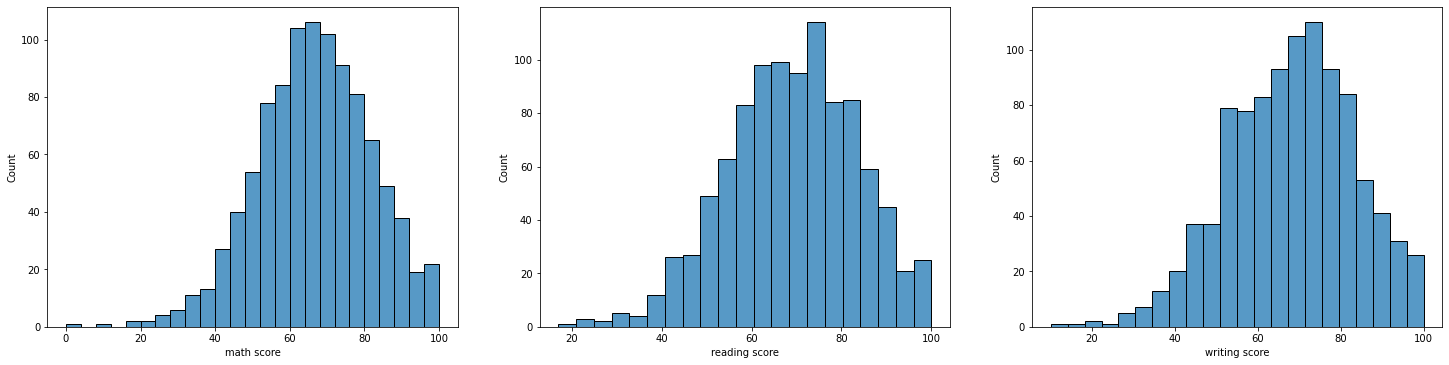

In [38]:
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
sns.histplot(data= train, x= 'math score');
f.add_subplot(332)
sns.histplot(data= train, x= 'reading score');
f.add_subplot(333)
sns.histplot(data= train, x= 'writing score');

# **Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

Checking gender count:

In [10]:
fig, ax = plt.subplots()
train['gender'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

We can see that the number of females is slightly higher than males in this dataset. 

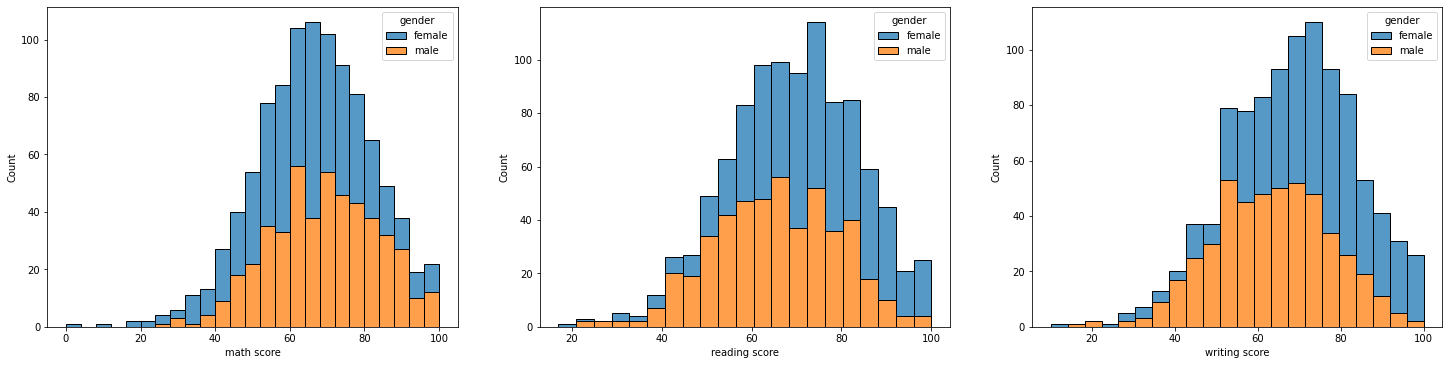

In [11]:
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
sns.histplot(data= train, x= 'math score', hue= 'gender', multiple= 'stack');
f.add_subplot(332)
sns.histplot(data= train, x= 'reading score', hue= 'gender', multiple= 'stack');
f.add_subplot(333)
sns.histplot(data= train, x= 'writing score', hue= 'gender', multiple= 'stack');

We can deduce that the percentage of females is higher at each test score. 

Now, we'll do the same for the rest of the features: 

In [12]:
catigorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [13]:
for col in catigorical_features:
    print('-'*50)
    print(f'The column name is: {col}')
    print(train[col].value_counts())

--------------------------------------------------
The column name is: gender
female    518
male      482
Name: gender, dtype: int64
--------------------------------------------------
The column name is: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
--------------------------------------------------
The column name is: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
--------------------------------------------------
The column name is: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
--------------------------------------------------
The column name is: test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64


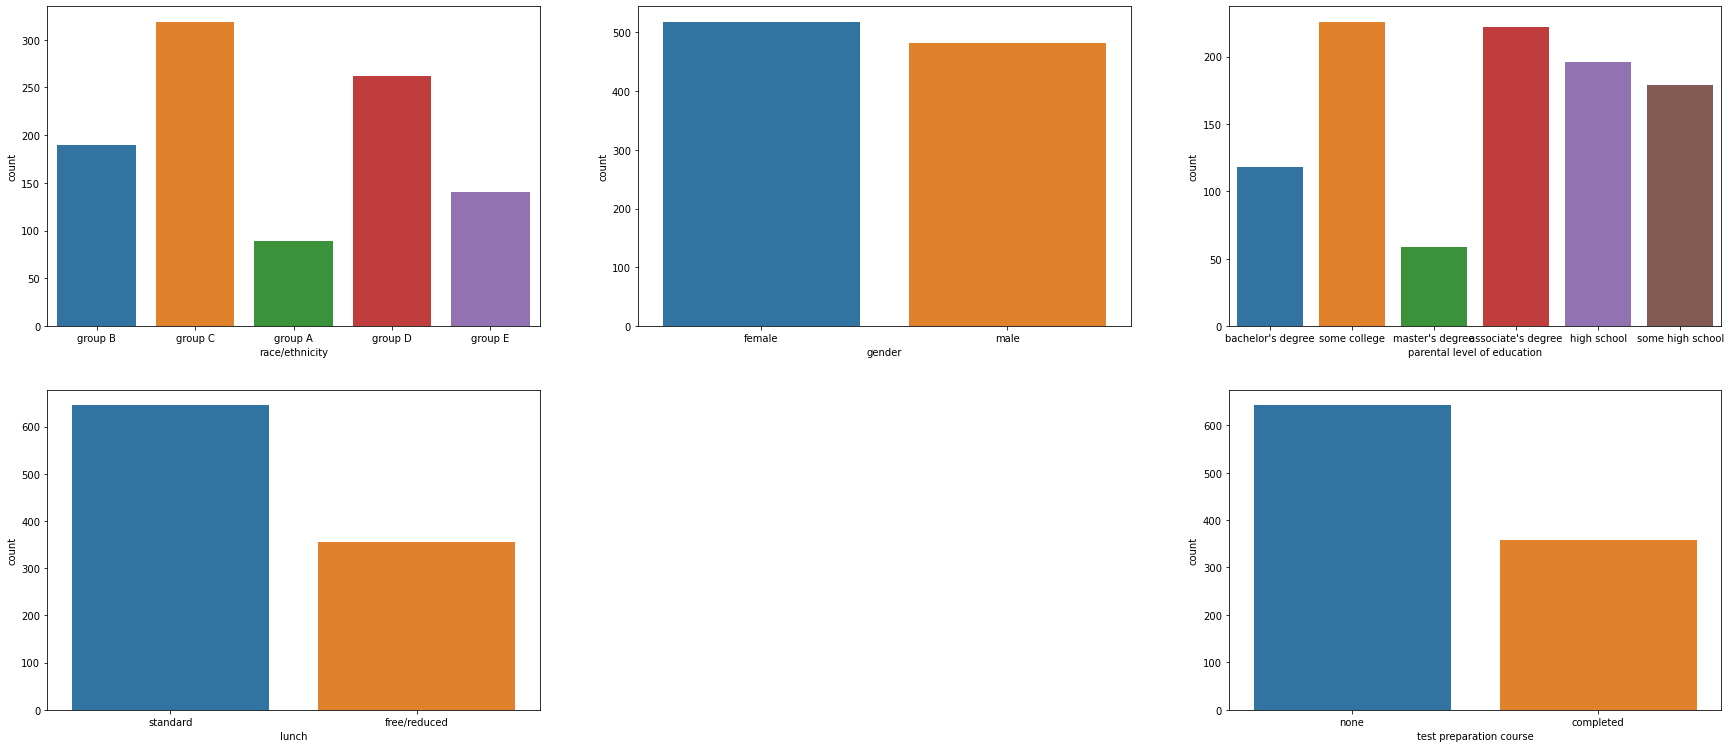

In [14]:
f = plt.figure(figsize=(30,20))
f.add_subplot(331)
sns.countplot(x= 'race/ethnicity', data= train);
f.add_subplot(332)
sns.countplot(x= 'gender', data= train);
f.add_subplot(333)
sns.countplot(x= 'parental level of education', data= train);
f.add_subplot(334)
sns.countplot(x= 'lunch', data= train);
f.add_subplot(336)
sns.countplot(x= 'test preparation course', data= train);

# **Multivariate Analysis**

Multivariate analysis examines two or more variables.

Examinging the count of each gender in each category: 

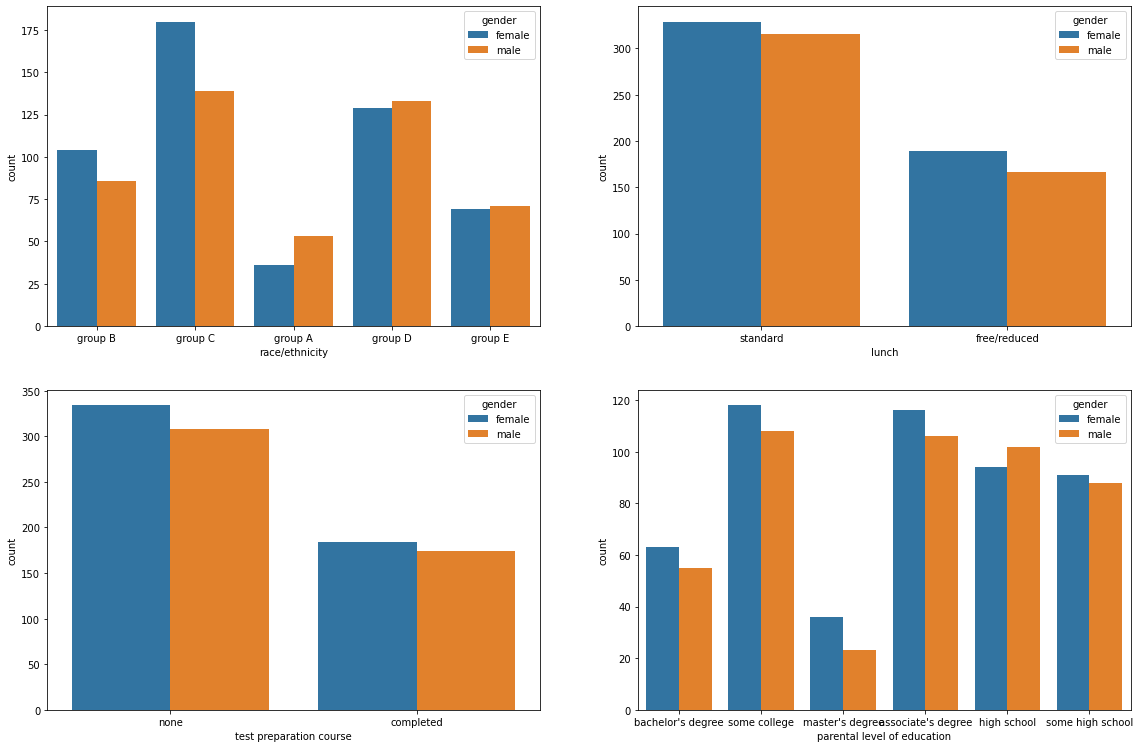

In [15]:
f = plt.figure(figsize=(30,20))
f.add_subplot(331)
sns.countplot(data= train,x='race/ethnicity',hue= 'gender');
f.add_subplot(332)
sns.countplot(data= train,x='lunch',hue= 'gender');
f.add_subplot(334)
sns.countplot(data= train,x='test preparation course',hue= 'gender');
f.add_subplot(335)
sns.countplot(data= train,x='parental level of education',hue= 'gender');


Examining the score for each gender in each category of parental level of education: 

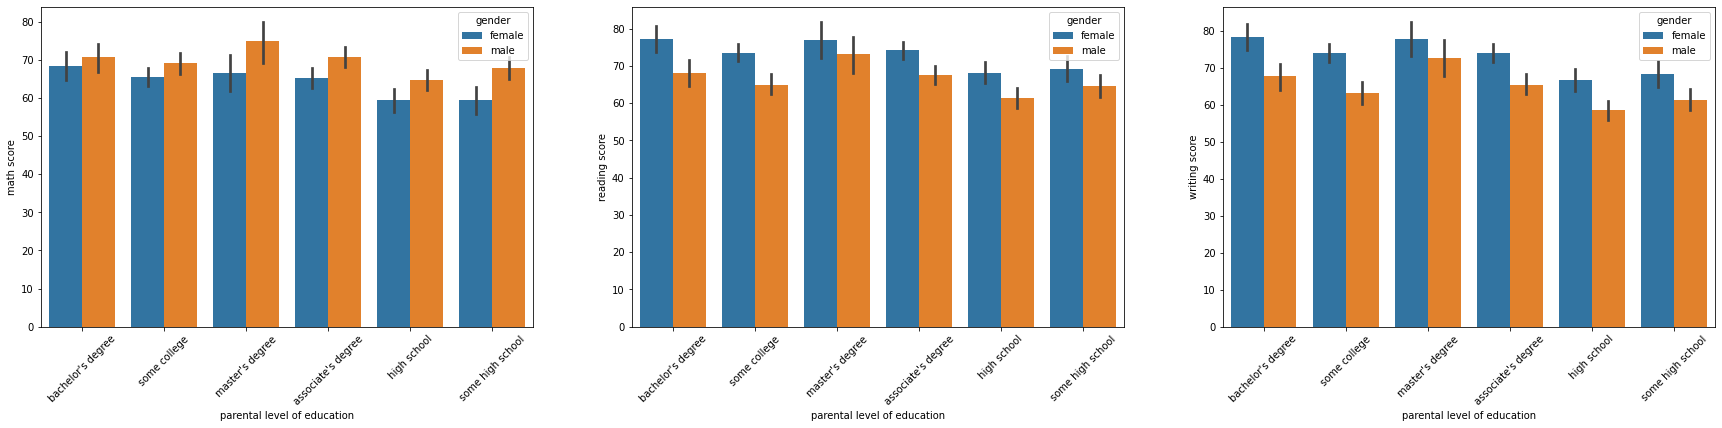

In [16]:
f = plt.figure(figsize=(30,20))
f.add_subplot(331)
sns.barplot(data= train, x='parental level of education',
              y='math score',
              hue= 'gender')
plt.xticks(rotation= 45);
f.add_subplot(332)
sns.barplot(data= train, x='parental level of education',
              y='reading score',
              hue= 'gender')
plt.xticks(rotation= 45);
f.add_subplot(333)
sns.barplot(data= train, x='parental level of education',
              y='writing score',
              hue= 'gender')
plt.xticks(rotation= 45);

Another way to examine the count of each gender in each category of race/ethnicity: 

In [18]:
pd.crosstab(train['race/ethnicity'], train['gender']).T

race/ethnicity  group A  group B  group C  group D  group E
gender                                                     
female               36      104      180      129       69
male                 53       86      139      133       71

Examining the mean score for each test for every group of race/ethnicity: 

In [19]:
train.groupby(['race/ethnicity'])[numerical_features].agg([np.mean]).T

race/ethnicity        group A    group B    group C    group D    group E
math score    mean  61.629213  63.452632  64.463950  67.362595  73.821429
reading score mean  64.674157  67.352632  69.103448  70.030534  73.028571
writing score mean  62.674157  65.600000  67.827586  70.145038  71.407143

group E scores the highest compared to students who belong to other groups.

In [20]:
train.groupby(['test preparation course'])[numerical_features].agg([np.mean]).T

test preparation course  completed       none
math score    mean       69.695531  64.077882
reading score mean       73.893855  66.534268
writing score mean       74.418994  64.504673

Those who complete test preparation course generally do better. 

In [21]:
train.groupby(['lunch'])[numerical_features].agg([np.mean]).T

lunch               free/reduced   standard
math score    mean     58.921127  70.034109
reading score mean     64.653521  71.654264
writing score mean     63.022535  70.823256

Those who have a standard lunch generally score better.

In [22]:
train.groupby(['parental level of education'])[numerical_features].agg([np.mean]).T

parental level of education  associate's degree  bachelor's degree  \
math score    mean                    67.882883          69.389831   
reading score mean                    70.927928          73.000000   
writing score mean                    69.896396          73.381356   

parental level of education  high school  master's degree  some college  \
math score    mean             62.137755        69.745763     67.128319   
reading score mean             64.704082        75.372881     69.460177   
writing score mean             62.448980        75.677966     68.840708   

parental level of education  some high school  
math score    mean                  63.497207  
reading score mean                  66.938547  
writing score mean                  64.888268

Students whose parents have a masters degree score higher, but not significantly higher than those whose parents have a bachelor's degree.

Checking for correlations between variables: 

In [23]:
train.corr()

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

<AxesSubplot:>

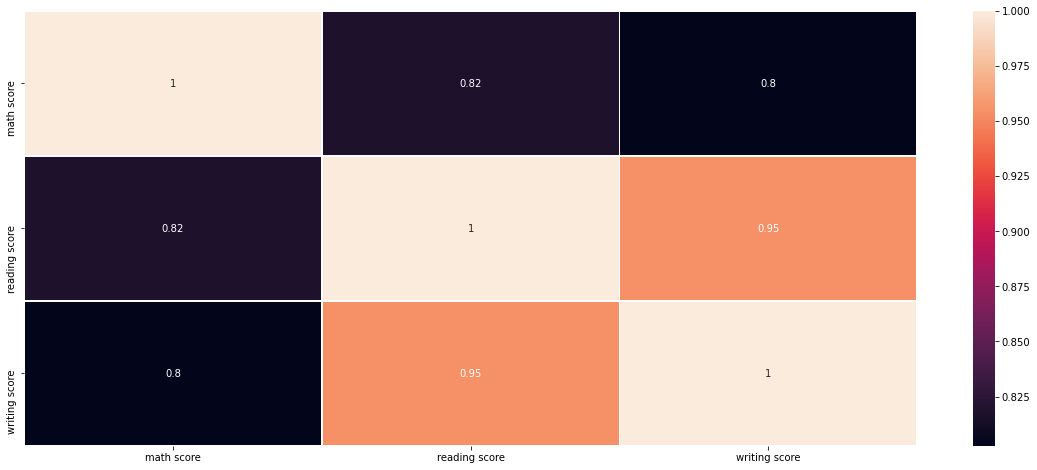

In [24]:
corr = train.corr()
f, ax = plt.subplots(figsize=(20, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,linewidths=.5, annot= True)

Another way to represent correlation between scores: 

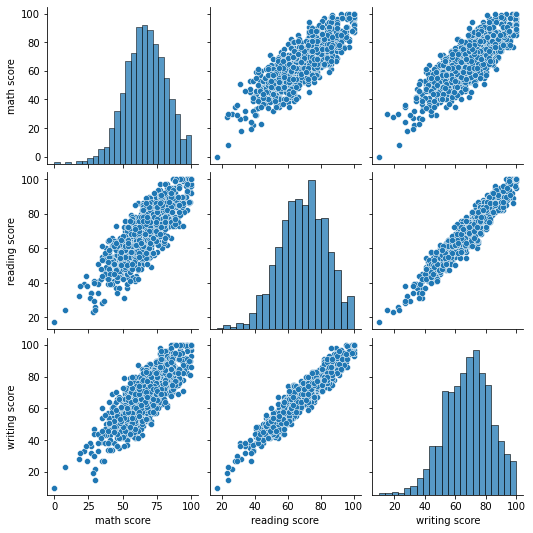

In [25]:
sns.pairplot(train[numerical_features]);

We can dedure that reading and writing scores are more correlated with each other math and reading/writing scores. 

# **Feature Engineering**

Calculate the final percentage of each student using the available three test scores: 

In [26]:
train['Final Percentage']= ((train['math score']+train['reading score']+train['writing score'])/3)


In [27]:
train['Final Percentage']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Final Percentage, Length: 1000, dtype: float64

divide the total grade as categories and then use pairplot 
// I am not sure I want do this now, might go first for pass/ fail and then divide into categories. 

Devide the final percentage into bins to determine a reasonable grade distribution:

In [28]:
train['Final Percentage'].value_counts(bins=10, sort=False)

(8.908000000000001, 18.1]      1
(18.1, 27.2]                   5
(27.2, 36.3]                  12
(36.3, 45.4]                  40
(45.4, 54.5]                 124
(54.5, 63.6]                 178
(63.6, 72.7]                 262
(72.7, 81.8]                 210
(81.8, 90.9]                 122
(90.9, 100.0]                 46
Name: Final Percentage, dtype: int64

Get the mean final percentage of students: 

In [29]:
train['Final Percentage'].mean()

67.77066666666664

Categorizing students into pass/fail:

In [30]:
train['Pass_Final'] = (train['Final Percentage'] > 40).map({True: "P",
                                                     False: "F"})

train['Pass_Final'].value_counts()

P    968
F     32
Name: Pass_Final, dtype: int64

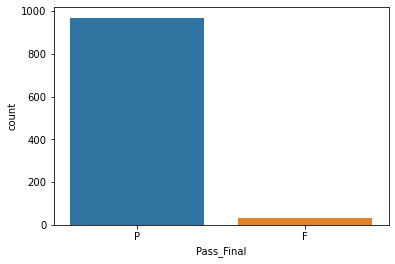

In [31]:
sns.countplot(data=train, x= 'Pass_Final');

Assigning a grade to each student based on the final percentage: 

In [32]:
def getGPA(grade):
    if grade > 80:
        return 'A'
    elif grade> 70:
        return 'B'
    elif grade > 60:
        return 'C'
    elif grade > 50:
        return 'D'
    elif grade > 40:
        return 'E'
    else:
        return 'F' 

In [33]:
train['GPA'] = train.apply(lambda df : getGPA(df['Final Percentage']), axis= 1)
train.head()      

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Final Percentage Pass_Final GPA  
0         72.666667          P   B  
1         82.333333          P   A  
2         92.666667          P   A  
3         49.333333          P   E  
4         76.333333          P   B

Grade distribution:

Text(0.5, 1.0, 'Number Of Students/GPA')

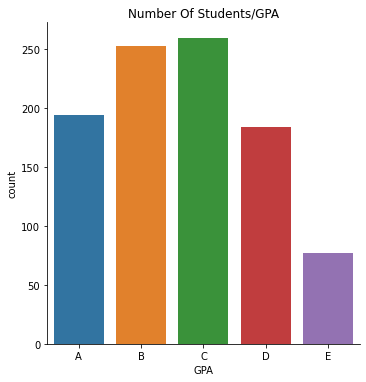

In [34]:
GPA_Order = ['A','B','C','D','E']
sns.catplot(data= train, x= 'GPA',order= GPA_Order, kind= 'count')
plt.title('Number Of Students/GPA')